<a href="https://colab.research.google.com/github/leahjk/Brief-tasks/blob/master/Copy_of_Yield_Estimation_using_ML_Narok_North.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
df1 = pd.read_csv("Yield_Parameters.csv")
df1.sample(5)

,year,rainfall,evi,fpar,lai,ndvi,temperature,smi,yield
4,2005,692.590095,3458.591737,49.591319,16.161886,0.626518,15.095932,0.302263,62237
9,2010,783.559142,3816.393055,52.585309,17.682840,0.653237,14.934402,0.328740,68749
1,2002,688.703798,3555.260682,51.215291,16.985956,0.658431,14.840879,0.267231,57791
8,2009,540.083020,2915.626020,42.138424,13.030746,0.554207,15.606537,0.237868,56780
0,2001,686.554072,3709.226451,52.323263,17.839963,0.661964,14.307010,0.313328,63518


In [ ]:
#df.shape

In [ ]:
df1.columns

Index(['year', 'rainfall', 'evi', 'fpar', 'lai', 'ndvi', 'temperature', 'smi',
       'yield'],
      dtype='object')

In [ ]:
df = df1.drop("year", axis=1)

In [ ]:
df.corr()

,rainfall,evi,fpar,lai,ndvi,temperature,smi,yield
rainfall,1.000000,0.557661,0.290723,0.289386,0.224519,-0.183302,0.732593,-0.214638
evi,0.557661,1.000000,0.928886,0.925055,0.847847,-0.447671,0.746729,0.215106
fpar,0.290723,0.928886,1.000000,0.993456,0.957763,-0.422849,0.563076,0.343320
lai,0.289386,0.925055,0.993456,1.000000,0.948341,-0.437850,0.555019,0.348047
ndvi,0.224519,0.847847,0.957763,0.948341,1.000000,-0.516395,0.476882,0.287722
temperature,-0.183302,-0.447671,-0.422849,-0.437850,-0.516395,1.000000,-0.353723,0.260952
smi,0.732593,0.746729,0.563076,0.555019,0.476882,-0.353723,1.000000,-0.025118
yield,-0.214638,0.215106,0.343320,0.348047,0.287722,0.260952,-0.025118,1.000000


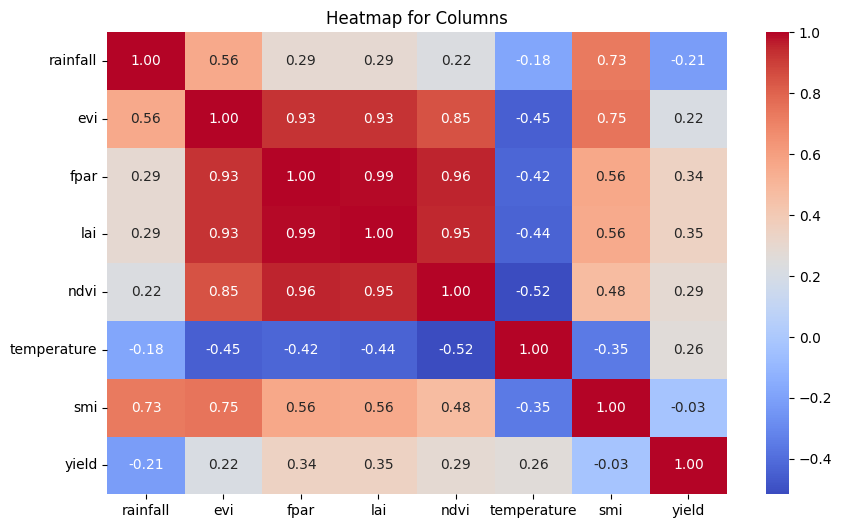

In [ ]:
# Function for creating Heat map:
def create_heatmap(data):
    plt.figure(figsize=(10,6))
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Heatmap for Columns')
    plt.show()

create_heatmap(df)

In [ ]:
X = df.drop(columns=['yield'])
y = df['yield']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create different Regression models:
Linear_regression = LinearRegression()
Ridge_Regression =  Ridge()
Lasso_Regression =  Lasso(alpha = 0.1)
Decision_Tree =  DecisionTreeRegressor()
Random_Forest = RandomForestRegressor()
Gradient_Boosting = GradientBoostingRegressor()
AdaBoost = AdaBoostRegressor()
XGBoost = XGBRegressor()
svr = SVR()

In [ ]:
model_list = [Linear_regression, Ridge_Regression, Lasso_Regression, Decision_Tree, Random_Forest, Gradient_Boosting, AdaBoost, XGBoost, svr]

In [ ]:
model_name = ["Linear regression", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "AdaBoost", "XGBoost", "svr"]

In [ ]:
# Creating list of accuracy of all the models and selecting best model with highest accuracy:
accuracy_list = []
for model in model_list:
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  accuracy = r2_score(y_test, y_pred)
  accuracy_list.append(accuracy)

# Creating dataframe of model with their respective accuracy:
model_df = pd.DataFrame({"Model": model_name, "Accuracy": accuracy_list})
model_df = model_df.sort_values(by='Accuracy', ascending=False)
model_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.093e+07, tolerance: 5.731e+04
  model = cd_fast.enet_coordinate_descent(


,Model,Accuracy
6,AdaBoost,0.674674
5,Gradient Boosting,0.565095
1,Ridge Regression,0.488702
7,XGBoost,0.471666
4,Random Forest,0.404541
3,Decision Tree,0.319990
2,Lasso Regression,-0.014942
0,Linear regression,-0.017434
8,svr,-0.235748


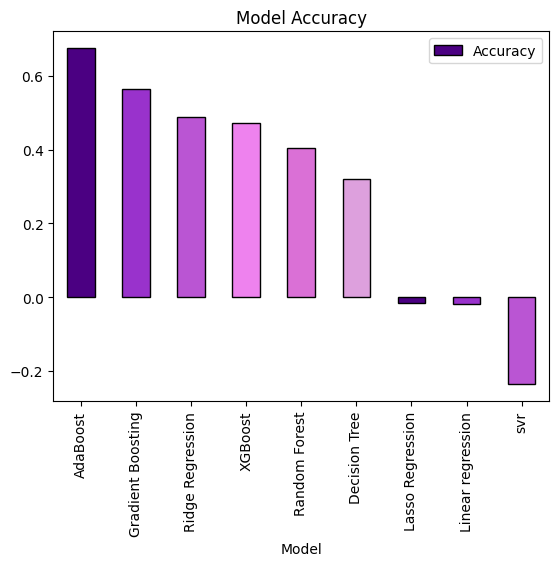

In [ ]:
# MODEL WITH ACCURACY

colors = ["INDIGO", "DARKORCHID", "mediumorchid", "violet", "orchid", "plum"]
model_df.plot.bar(x='Model', y='Accuracy', color = colors, edgecolor ='black')

# Add title
plt.title('Model Accuracy')

# Show plot
plt.show()

# HyperParameter Tuning and Model Develoment

### ADABOOST

In [ ]:
# Define the parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

In [ ]:
# Initialize AdaBoostRegressor
ada_boost = AdaBoostRegressor()

# Perform Grid Search with cross-validation
grid_search_ada = GridSearchCV(estimator=ada_boost, param_grid=param_grid_ada, cv=5)
grid_search_ada.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]})

In [ ]:
# Print the best hyperparameters
best_params_ada = grid_search_ada.best_params_
print("Best hyperparameters for AdaBoost:", best_params_ada)

Best hyperparameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}


In [ ]:
# Initialize AdaBoostRegressor with best hyperparameters
#ada_boost_tuned = AdaBoostRegressor(learning_rate=0.01, n_estimators=100)
ada_boost_tuned = AdaBoostRegressor(**best_params_ada)

In [ ]:
# Fit the model to the training data
ada_boost_tuned.fit(X_train_scaled, y_train)

AdaBoostRegressor(learning_rate=0.01)

In [ ]:
# Make predictions on the test data
y_pred_ada_tuned = ada_boost_tuned.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy_ada_tuned = r2_score(y_test, y_pred_ada_tuned)
print("Tuned AdaBoost R^2 Score:", accuracy_ada_tuned)

Tuned AdaBoost R^2 Score: 0.2465977371503173


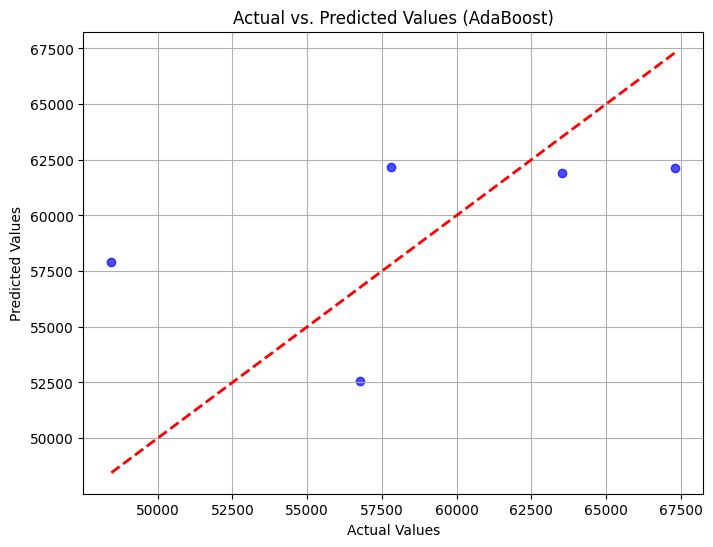

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ada_tuned, color='blue', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (AdaBoost)')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.grid(True)
plt.show()

### Gradient Boost

In [ ]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
grid_search_gb = GridSearchCV(estimator=Gradient_Boosting, param_grid=param_grid_gb, cv=5)
grid_search_gb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
best_params_gb = grid_search_gb.best_params_
print("Best hyperparameters:", best_params_gb)

Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
Gradient_Boosting = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 4, min_samples_leaf = 4,min_samples_split = 2, n_estimators = 100)
Gradient_Boosting.fit(X_train_scaled, y_train)
final_gb_y = Gradient_Boosting.predict(X_test_scaled)

In [ ]:
final_gb_accuracy = r2_score(y_test, final_gb_y)
final_gb_accuracy

0.3379034580717397

### XGBoost

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [ ]:
grid_search_xgb = GridSearchCV(XGBoost, param_grid_xgb, cv=5, verbose=2)
grid_search_xgb.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
best_params_xgb = grid_search_xgb.best_params_
print("Best hyperparameters:", best_params_xgb)

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
XGBoost = XGBRegressor(learning_rate = 0.01, max_depth = 3, n_estimators = 100)
XGBoost.fit(X_train_scaled, y_train)
final_xgb_y = XGBoost.predict(X_test_scaled)

In [ ]:
final_xgb_accuracy = r2_score(y_test, final_xgb_y)
final_xgb_accuracy

0.46456262121054126

### Ridge Regression

In [ ]:
# Define the parameter grid to search over (Note: These are NOT XGBoost parameters, but for Ridge)
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [ ]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(Ridge_Regression, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

NameError: name 'param_grid' is not defined

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

In [ ]:
# Train the model with the best hyperparameters
best_ridge = Ridge(**best_params)
best_ridge.fit(X_train_scaled, y_train)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
y_pred = best_ridge.predict(X_test_scaled)
ridge_accuracy = r2_score(y_test, y_pred)
print("r2 accuracy:", ridge_accuracy)

### Decision Trees

In [ ]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['absolute_error', 'poisson'] #{'friedman_mse', 'absolute_error', 'squared_error', 'poisson'}
}

In [ ]:
grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5, verbose=2)
grid_search_dt.fit(X_train_scaled, y_train)

In [ ]:
best_params_dt = grid_search_dt.best_params_
print("Best hyperparameters:", best_params_dt)

In [ ]:
# Initialize the Decision Tree model with the best hyperparameters
Decision_Tree_Tuned = DecisionTreeRegressor(criterion='absolute_error', max_depth=None, min_samples_leaf=2, min_samples_split=10)

# Fit the model to the training data
Decision_Tree_Tuned.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_dt_tuned = Decision_Tree_Tuned.predict(X_test_scaled)


In [ ]:
# Evaluate the model
accuracy_dt_tuned = r2_score(y_test, y_pred_dt_tuned)
print("Tuned Decision Tree R^2 Score:", accuracy_dt_tuned)

# Accuracy Plotting

In [ ]:
accuracy_scores = [
    0.749976,
    0.758049,
    0.727212,
    0.872531,
    0.832916,
    0.8962464652601693,
    0.774174,
    0.9157052302276633,
    0.823192
]

In [ ]:
model_name = ["Linear regression", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest", "Gradient_Boosting", "AdaBoost", "XGBoost", "svr"]

In [ ]:
# CREATING NEW DATAFRAME OF MODEL WITH THEIR RESPECTIVE ACCURACY AFTER HYPERPARAMETER TUNING

model_df1 = pd.DataFrame({"Model": model_name, "Accuracy": accuracy_scores})
model_df1

In [ ]:
# MODEL WITH ACCURACY

colors = ['lightpink','pink','hotpink','deeppink','mediumvioletred',]
model_df1.plot.bar(x='Model', y='Accuracy', color = colors, edgecolor = 'black')

# Add title
plt.title('Model Accuracy')

# Show plot
plt.show()


# Export Model to Save

In [ ]:
import pickle

In [ ]:
pickle.dump(XGBoost, open("Groundnut_xgb.pkl", 'wb'))